# 1.Introduction

This analysis focuses on a leading primary healthcare provider in Kenya that is committed to delivering high-quality, affordable, and accessible medical services through a network of medical centers.

To fulfill its mission of improving healthcare delivery and enhancing patient satisfaction, the organization leverages data to evaluate performance, uncover trends, and support evidence-based decision-making.

The analysis explores clinical visit data to generate actionable insights into:

- **Patient behavior** and visit trends  
- **Service delivery performance** across medical centers  
- **Financial metrics**, including total and average visit revenue  
- **Patient satisfaction**, measured using the Net Promoter Score (NPS)

The dataset includes:
- Visit date and time  
- Medical center visited  
- Visit category (in-person or telemedicine)  
- Payment method (Cash or Insurance)  
- Diagnoses recorded  
- Amount invoiced  
- NPS score (0–10 scale)

The goal of this analysis is to identify opportunities for operational improvement, enhance service quality and improve patient outcomes through data-driven insights.

# 2. Business Understanding

The organization under analysis operates a network of medical centers in Kenya, offering both in-person and virtual consultations to thousands of patients each year. As a primary healthcare provider, it is essential for the organization to ensure:

- Operational efficiency across all locations  
- High levels of patient satisfaction  
- Financial sustainability  
- Effective disease management and service delivery  

The business seeks to understand how patients interact with its services, what drives revenue and how to continuously improve care quality. With a diverse patient base and multiple payor types (e.g., cash, insurance), it becomes crucial to assess how different visit characteristics influence both clinical outcomes and business performance.

## 2a). Problem Statement

The organization aims to deliver high-quality, affordable healthcare while ensuring patient satisfaction and operational efficiency across its network of medical centers. However, it currently lacks a unified, data-driven understanding of how different visit types, payment methods, and medical centers impact revenue, patient experience, and service utilization.

The organization faces several challenges:

- Identifying which factors influence high or low patient satisfaction (as measured by NPS scores)  
- Understanding revenue trends across payor types and medical centers  
- Analyzing patterns in patient visits, including volume, visit type (in-person vs virtual) and common diagnoses  
- Making strategic decisions based on actionable insights from clinical data  

To address these challenges, this project analyzes historical visit data to uncover trends, highlight key performance indicators (KPIs) and provide insights that support data-informed decision-making for improved healthcare delivery and business growth.

## 2b). Main Objective
The primary objective of this analysis is to extract actionable insights from the healthcare provider’s clinical visit data to support strategic decision-making aimed at enhancing healthcare delivery and business performance. Specifically, this analysis will:
- Evaluate patient visit trends across medical centers and visit categories (in-person vs virtual).
- Assess revenue performance by analyzing total and average visit charges across different payor types (Cash vs Insurance).
- Analyze patient satisfaction using Net Promoter Score (NPS) and identify key drivers influencing high or low ratings.
- Identify the most common diagnoses and explore their patterns over time, by location, and visit type.
- Support data-driven decisions for resource allocation, service improvement, and patient experience enhancement.

By accomplishing these goals, the analysis will enable the healthcare provider to optimize operations, improve patient satisfaction, and strengthen financial sustainability.

## 3.Data Understanding
This dataset contains detailed information about medical visits at the healthcare provider. It includes data on billing, diagnoses, and patient satisfaction related to each clinical visit.

- Visit Table: Contains information on each clinical visit, identified by a unique VisitCode.
- Billing Table: Contains data on the total billed amount for each visit.
Note: Multiple invoices can be issued for a single visit.
- Diagnosis Table: Contains diagnosis details linked to each visit.
Note: A single visit may have multiple diagnoses.

### 3.1.Loading Data

In [176]:
#Loading all relevant libraries for this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### 3.2.Reading the data

In [177]:
#To read all sheets into a dictionary of dataf
# Replace 'your_excel_file.xlsx' with the path to your Excel file.
file_path = 'BI_Analyst_Assessment_Data_2023.xlsx'

# Use the `pd.ExcelFile` constructor to open the Excel file.
xls = pd.ExcelFile(file_path)

# Get the list of sheet names in the Excel file.
sheet_names = xls.sheet_names

print(sheet_names)

['Visit Tbl', 'Invoice Tbl', 'Diagnosis Tbl', 'Data Dictionary']


In [178]:
# To read a specific sheet:
# Replace 'Sheet1' with the name of the sheet .
visits = pd.read_excel(xls, 'Visit Tbl')

# To read all sheets into a dictionary of dataframes:
dfs = {sheet_name: xls.parse(sheet_name) for sheet_name in sheet_names}

# Now, you can access each sheet's data using the dictionary.
# For example, to access the 'Sheet2' data:
sheet2_data = dfs['Invoice Tbl']

sheet3_data = dfs['Diagnosis Tbl']

sheet4_data = dfs['Data Dictionary']

In [179]:
#Reading the data (Top 5 records)
visits = pd.read_excel('BI_Analyst_Assessment_Data_2023.xlsx')
visits.head(5)

,VisitCode,PatientCode,VisitDateTime,MedicalCenter,VisitCategory,Payor,NPS Score
0,XA-1124501,38af25ef-37a9,2022-05-22 08:51:05,Tassia,In-person Visit,Cash,NaN
1,XA-1220993,15ac7a77-8153,2022-09-07 10:56:49,Tassia,In-person Visit,Cash,NaN
2,XA-1079995,173f581e-c323,2022-03-24 17:17:32,Tassia,In-person Visit,Cash,NaN
3,XA-1188078,c464fa34-e7f2,2022-07-27 05:54:02,Tassia,In-person Visit,Cash,NaN
4,XA-1220192,7b8216fe-ff14,2022-09-06 12:28:24,Tassia,In-person Visit,Cash,NaN


In [180]:
#Read the last 5 records
visits.tail()

,VisitCode,PatientCode,VisitDateTime,MedicalCenter,VisitCategory,Payor,NPS Score
45221,XA-1205122,ba50d372-f96b,2022-08-17 16:58:33,Tassia,In-person Visit,Insurance Company A,NaN
45222,XA-1249429,152641fd-57b1,2022-10-09 21:42:44,Pipeline,In-person Visit,Insurance Company A,NaN
45223,XA-1148829,98a60ab5-98b6,2022-06-14 09:54:49,Embakasi,In-person Visit,Insurance Company A,NaN
45224,XA-1097992,019c4de2-d1cc,2022-04-19 15:20:16,Lucky Summer,In-person Visit,Insurance Company A,NaN
45225,XA-1134520,c3171212-6331,2022-06-01 14:04:32,Embakasi,In-person Visit,Insurance Company A,NaN


In [181]:
payments= pd.read_excel(xls, 'Invoice Tbl')
payments.head()

,VisitCode,Amount
0,XA-1193961,195
1,XA-1234414,195
2,XA-1250805,195
3,XA-1194042,195
4,XA-1187472,195


In [182]:
diagnosis= pd.read_excel(xls, 'Diagnosis Tbl')
diagnosis.head()

,VisitCode,Diagnosis
0,XA-1214549,acute rhinitis
1,XA-1234446,acute bronchitis
2,XA-1160097,family planning
3,XA-1242842,acute bronchitis
4,XA-1152096,"tonsillitis, acute bacterial"


In [183]:
df4 = pd.read_excel(xls, 'Data Dictionary')
df4.head()

,Table Name,Table Description,Column Name,Column Description
0,Visit Tbl,This table contains information and details fo...,VisitCode,A unique ID assigned to each clinical visit
1,NaN,NaN,PatientCode,A unique ID assigned to each patient
2,NaN,NaN,VisitDateTime,Date on which the visit occurred
3,NaN,NaN,MedicalCenter,The medical centre at which the visit occurred
4,NaN,NaN,VisitCategory,The nature of visit whether in person or vitual


In [184]:
# Merge all tables on 'VisitCode'
merged_df = visits.merge(payments, on="VisitCode", how="left") \
                  .merge(diagnosis, on="VisitCode", how="left")

# Display merged data
merged_df.head()

,VisitCode,PatientCode,VisitDateTime,MedicalCenter,VisitCategory,Payor,NPS Score,Amount,Diagnosis
0,XA-1124501,38af25ef-37a9,2022-05-22 08:51:05,Tassia,In-person Visit,Cash,NaN,560,NaN
1,XA-1220993,15ac7a77-8153,2022-09-07 10:56:49,Tassia,In-person Visit,Cash,NaN,1600,NaN
2,XA-1079995,173f581e-c323,2022-03-24 17:17:32,Tassia,In-person Visit,Cash,NaN,2775,NaN
3,XA-1188078,c464fa34-e7f2,2022-07-27 05:54:02,Tassia,In-person Visit,Cash,NaN,1800,review
4,XA-1220192,7b8216fe-ff14,2022-09-06 12:28:24,Tassia,In-person Visit,Cash,NaN,1460,acute rhinitis


Used LEFT JOIN to keep all visits, even those without a recorded diagnosis.
This ensured I don’t lose visits just because no diagnosis was recorded.

In [185]:
merged_df.columns

Index(['VisitCode', 'PatientCode', 'VisitDateTime', 'MedicalCenter',
       'VisitCategory', 'Payor', 'NPS Score', 'Amount', 'Diagnosis'],
      dtype='object')

In [186]:
#create a copy of the dataset without changing the original 
data = merged_df.copy()

### 3.3.Explore dataframes  
 Descriptive exploration of data

In [187]:
#Determining the no. of records in our dataset
merged_df.shape

(48147, 9)

There are 48147 rows and 9 columns in the dataset

In [188]:
# Check dataframe information
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48147 entries, 0 to 48146
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   VisitCode      48147 non-null  object        
 1   PatientCode    48147 non-null  object        
 2   VisitDateTime  48147 non-null  datetime64[ns]
 3   MedicalCenter  48147 non-null  object        
 4   VisitCategory  48147 non-null  object        
 5   Payor          48147 non-null  object        
 6   NPS Score      2022 non-null   float64       
 7   Amount         48147 non-null  int64         
 8   Diagnosis      22119 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 3.7+ MB


The data types for all the columns are correct.

In [189]:
# Get unique values for columns
merged_df.nunique()

VisitCode        45226
PatientCode      28416
VisitDateTime    45176
MedicalCenter        8
VisitCategory        2
Payor                3
NPS Score           12
Amount            5288
Diagnosis           31
dtype: int64

Penda Health has 8 medical centers

In [190]:
merged_df['MedicalCenter'].unique()

array(['Tassia', 'Pipeline', 'Embakasi', 'Githurai 45', 'Mathare North',
       'Kimathi Street', 'Lucky Summer', 'Call Centre'], dtype=object)

The above are the names of medical centers.

In [191]:
merged_df['VisitCategory'].unique()

array(['In-person Visit', 'Telemedicine Visit'], dtype=object)

There are only two visit categories ie in person and virtual

In [192]:
# Check value counts
merged_df['VisitCategory'].value_counts().to_frame()

,VisitCategory
In-person Visit,42829
Telemedicine Visit,5318


- The number of patients who visited Penda health clinic in person were 42829 while those that were attended to remotely was 5318.

In [193]:
merged_df['Payor'].unique()

array(['Cash', 'Insurance Company B', 'Insurance Company A'], dtype=object)

- The methods of payment used at the Health facility are 2 i.e
- Cash
- Insurance company (A and B)

In [194]:
merged_df['MedicalCenter'].value_counts().to_frame(name='VisitCount')

,VisitCount
Tassia,11966
Pipeline,10329
Embakasi,5410
Call Centre,5339
Githurai 45,4459
Lucky Summer,3654
Kimathi Street,3538
Mathare North,3452


In [195]:
grouped_counts = merged_df.groupby(['MedicalCenter', 'VisitCategory']).size().reset_index(name='VisitCount')
grouped_counts

,MedicalCenter,VisitCategory,VisitCount
0,Call Centre,In-person Visit,21
1,Call Centre,Telemedicine Visit,5318
2,Embakasi,In-person Visit,5410
3,Githurai 45,In-person Visit,4459
4,Kimathi Street,In-person Visit,3538
5,Lucky Summer,In-person Visit,3654
6,Mathare North,In-person Visit,3452
7,Pipeline,In-person Visit,10329
8,Tassia,In-person Visit,11966


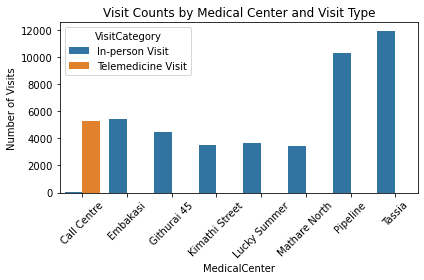

In [196]:
sns.barplot(data=grouped_counts, x='MedicalCenter', y='VisitCount', hue='VisitCategory')
plt.title('Visit Counts by Medical Center and Visit Type')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The busiest clinic was Tassia while the least busy clinic was Mathare North.

In [197]:
# Check dataframe description
merged_df.describe()

,NPS Score,Amount
count,2022.000000,48147.000000
mean,8.844214,1715.443641
std,2.496304,1625.647707
min,0.000000,0.000000
25%,9.000000,375.000000
50%,10.000000,1340.000000
75%,10.000000,2500.000000
max,11.000000,20059.000000


The maximum score is 11, which is outside the standard NPS range of 0-10

## 4.Data Cleaning

Data cleaning methods were employed to check for:
- Consistency
- Validity
- Completeness

In [198]:
#checking for duplicates
merged_df.duplicated().sum()

749

In [199]:
# Identifying the Missing Data
data.isnull().sum()

VisitCode            0
PatientCode          0
VisitDateTime        0
MedicalCenter        0
VisitCategory        0
Payor                0
NPS Score        46125
Amount               0
Diagnosis        26028
dtype: int64

The diagnosis and NPS Score columns have missing values.

- NPS Score is Heavily Missing
- Over 46k missing NPS scores suggest that many patients did not provide feedback.
This may be due to:
 - Optional surveys
  - Patients skipping the feedback form
  - System not prompting consistently
  
- Diagnosis Field Missing in 26k+ Records
  - This is clinically critical and should not be missing.



### 4.1.Handling Missing Values 

In [200]:
#To check which visits are missing a diagnosis
missing_diagnosis = merged_df[merged_df['Diagnosis'].isna()]
missing_diagnosis.head()

,VisitCode,PatientCode,VisitDateTime,MedicalCenter,VisitCategory,Payor,NPS Score,Amount,Diagnosis
0,XA-1124501,38af25ef-37a9,2022-05-22 08:51:05,Tassia,In-person Visit,Cash,NaN,560,NaN
1,XA-1220993,15ac7a77-8153,2022-09-07 10:56:49,Tassia,In-person Visit,Cash,NaN,1600,NaN
2,XA-1079995,173f581e-c323,2022-03-24 17:17:32,Tassia,In-person Visit,Cash,NaN,2775,NaN
5,XA-1155744,6c9e65f2-38d3,2022-06-20 10:54:27,Tassia,In-person Visit,Cash,NaN,3170,NaN
6,XA-1222176,7d456b69-494d,2022-09-08 16:57:00,Tassia,In-person Visit,Cash,9.0,50,NaN


In [201]:
missing_diagnosis.tail()

,VisitCode,PatientCode,VisitDateTime,MedicalCenter,VisitCategory,Payor,NPS Score,Amount,Diagnosis
48141,XA-1249429,152641fd-57b1,2022-10-09 21:42:44,Pipeline,In-person Visit,Insurance Company A,NaN,2435,NaN
48142,XA-1249429,152641fd-57b1,2022-10-09 21:42:44,Pipeline,In-person Visit,Insurance Company A,NaN,2435,NaN
48143,XA-1148829,98a60ab5-98b6,2022-06-14 09:54:49,Embakasi,In-person Visit,Insurance Company A,NaN,1480,NaN
48144,XA-1097992,019c4de2-d1cc,2022-04-19 15:20:16,Lucky Summer,In-person Visit,Insurance Company A,NaN,1280,NaN
48145,XA-1097992,019c4de2-d1cc,2022-04-19 15:20:16,Lucky Summer,In-person Visit,Insurance Company A,NaN,1280,NaN


#### 4.1.1.Which visit categories are missing diagnoses?

In [202]:
print(merged_df[merged_df['Diagnosis'].isna()]['VisitCategory'].value_counts())

In-person Visit       21400
Telemedicine Visit     4628
Name: VisitCategory, dtype: int64


In [203]:
# Step 1: Filter rows with missing diagnoses
missing_diagnosis = merged_df[merged_df['Diagnosis'].isna()]

# Step 2: Count missing diagnoses by VisitCategory
missing_by_category = missing_diagnosis['VisitCategory'].value_counts()

In [204]:
missing_by_category

In-person Visit       21400
Telemedicine Visit     4628
Name: VisitCategory, dtype: int64

#### 4.1.2.Visualize the Missing Data

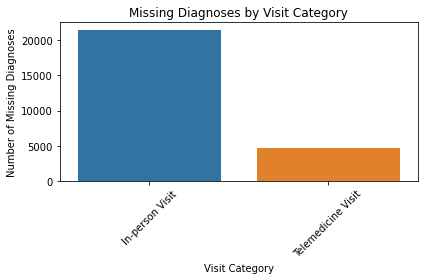

In [205]:
sns.barplot(x=missing_by_category.index, y=missing_by_category.values)
plt.title('Missing Diagnoses by Visit Category')
plt.xlabel('Visit Category')
plt.ylabel('Number of Missing Diagnoses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A large number of missing diagnoses in in-person visits may indicate:
- Data entry issues
- Diagnosis not being recorded at the point of care
- System bugs during form submission

Missing diagnoses in telemedicine might be due to:
- Preliminary consultations without confirmed diagnosis
- Connectivity issues or documentation limitations during virtual visits

#### 4.1.3. Are certain medical centers missing diagnoses more often?

In [206]:
merged_df[merged_df['Diagnosis'].isna()]['MedicalCenter'].value_counts()

Tassia            5733
Call Centre       4645
Pipeline          4584
Embakasi          2629
Kimathi Street    2388
Githurai 45       2270
Mathare North     2028
Lucky Summer      1751
Name: MedicalCenter, dtype: int64

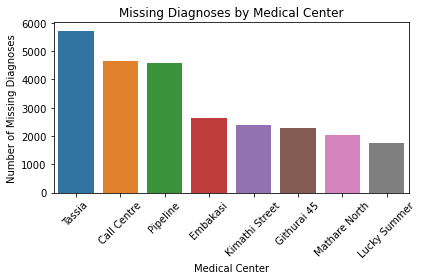

In [207]:
missing_by_center = merged_df[merged_df['Diagnosis'].isna()]['MedicalCenter'].value_counts()

sns.barplot(x=missing_by_center.index, y=missing_by_center.values)
plt.title('Missing Diagnoses by Medical Center')
plt.xlabel('Medical Center')
plt.ylabel('Number of Missing Diagnoses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [208]:
missing_diagnosis = merged_df[merged_df['Diagnosis'].isna()]
missing_by_center_category = (
    missing_diagnosis
    .groupby(['MedicalCenter', 'VisitCategory'])
    .size()
    .reset_index(name='MissingCount')
)
missing_by_center_category


,MedicalCenter,VisitCategory,MissingCount
0,Call Centre,In-person Visit,17
1,Call Centre,Telemedicine Visit,4628
2,Embakasi,In-person Visit,2629
3,Githurai 45,In-person Visit,2270
4,Kimathi Street,In-person Visit,2388
5,Lucky Summer,In-person Visit,1751
6,Mathare North,In-person Visit,2028
7,Pipeline,In-person Visit,4584
8,Tassia,In-person Visit,5733


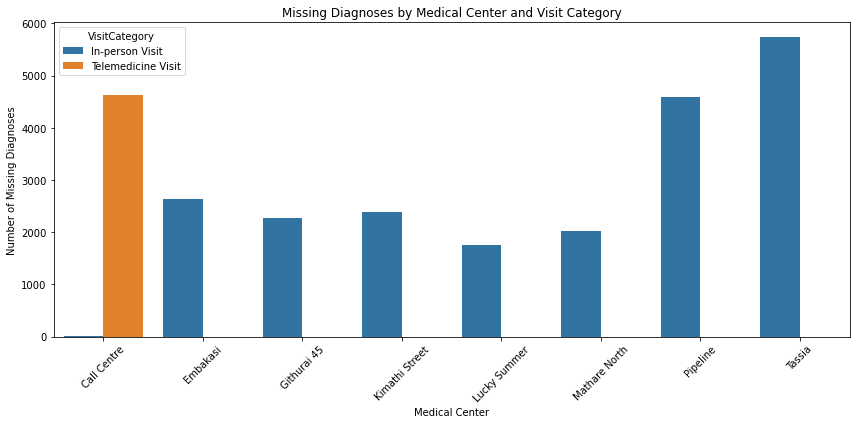

In [209]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=missing_by_center_category,
    x='MedicalCenter',
    y='MissingCount',
    hue='VisitCategory'
)

plt.title('Missing Diagnoses by Medical Center and Visit Category')
plt.xlabel('Medical Center')
plt.ylabel('Number of Missing Diagnoses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Are missing diagnoses related to payment types (Payor)?

In [210]:
merged_df[merged_df['Diagnosis'].isna()]['Payor'].value_counts()

Cash                   20746
Insurance Company B     4280
Insurance Company A     1002
Name: Payor, dtype: int64

In [211]:
# Fill missing diagnosis fields
merged_df['Diagnosis'].fillna('Not Diagnosed', inplace=True)
merged_df['Diagnosis'].fillna('Unknown', inplace=True)

In [212]:
# Verify that missing values are handled
print(merged_df.isna().sum())  # Check for any remaining NaN values

VisitCode            0
PatientCode          0
VisitDateTime        0
MedicalCenter        0
VisitCategory        0
Payor                0
NPS Score        46125
Amount               0
Diagnosis            0
dtype: int64


In [213]:
f"Missing NPS Scores: {merged_df['NPS Score'].isna().sum()}"
merged_df[merged_df['NPS Score'].isna()].head()  # Preview missing rows

,VisitCode,PatientCode,VisitDateTime,MedicalCenter,VisitCategory,Payor,NPS Score,Amount,Diagnosis
0,XA-1124501,38af25ef-37a9,2022-05-22 08:51:05,Tassia,In-person Visit,Cash,NaN,560,Not Diagnosed
1,XA-1220993,15ac7a77-8153,2022-09-07 10:56:49,Tassia,In-person Visit,Cash,NaN,1600,Not Diagnosed
2,XA-1079995,173f581e-c323,2022-03-24 17:17:32,Tassia,In-person Visit,Cash,NaN,2775,Not Diagnosed
3,XA-1188078,c464fa34-e7f2,2022-07-27 05:54:02,Tassia,In-person Visit,Cash,NaN,1800,review
4,XA-1220192,7b8216fe-ff14,2022-09-06 12:28:24,Tassia,In-person Visit,Cash,NaN,1460,acute rhinitis


## 5.Exploratory Data Analysis(EDA)
In trying to understand our data better, let's check for the distribution of the individual features in our dataset.  
Answer a few questions:
- 1. Volume & Trends

What is the overall number of visits?
How has the number of visits changed over time (daily/monthly)?
Which medical center has the highest/lowest number of visits?
Are there seasonal patterns in visit volume?

- 2. Visit Types

What proportion of visits are in-person vs telemedicine?
Are telemedicine visits increasing over time?
Which medical centers offer more telemedicine services?

- 3. Patient Insights

How many unique patients are in the dataset?
How often do patients return for multiple visits?

- 4. Payment Analysis

What is the average, median, and range of payment amounts?
Are there outliers in payment amounts?

How do payment amounts differ by:
- Visit category (in-person vs telemedicine)?
- Payor type (Cash vs Insurance)?
- Medical center?


 ### Visit Frequency Over Time
Insights You Can Draw From This:
- Seasonal patterns in in-person vs telemedicine visits.
- Spikes or drops after holidays, marketing campaigns, or events.
- Whether telemedicine has a growing trend compared to in-person visits.

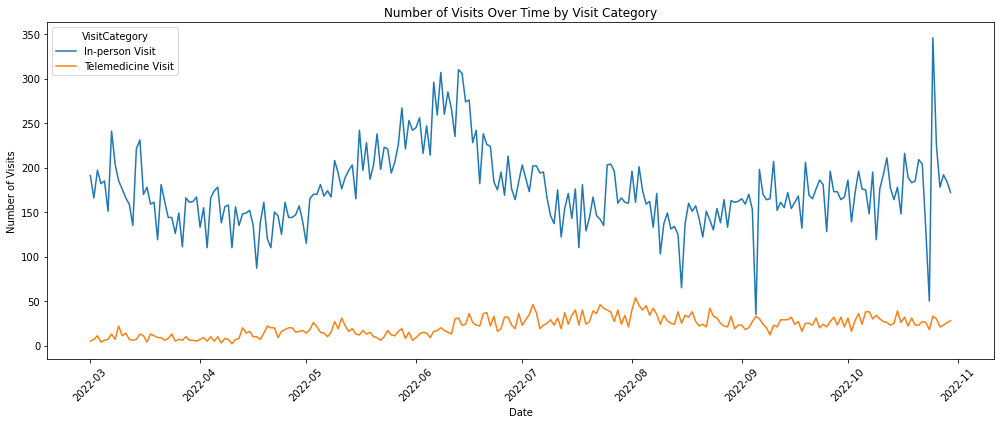

In [214]:
# Step 1: Ensure datetime formatting
merged_df['VisitDateTime'] = pd.to_datetime(merged_df['VisitDateTime'])
merged_df['VisitDate'] = merged_df['VisitDateTime'].dt.date  # Or use .dt.floor('D') for datetime

# Step 2: Group by VisitDate and VisitCategory
visit_trend = merged_df.groupby(['VisitDate', 'VisitCategory']).size().reset_index(name='VisitCount')

# Step 3: Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=visit_trend, x='VisitDate', y='VisitCount', hue='VisitCategory')

plt.title("Number of Visits Over Time by Visit Category")
plt.xlabel("Date")
plt.ylabel("Number of Visits")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Trends per month per Medical Center
- Peaks and dips in usage per center over time.
- Seasonal trends (e.g., more visits during flu season).
- Centers with growing vs. declining traffic.
- Potential impact of external events (e.g., policy change, new facility opening).

In [215]:
# 1. Ensure VisitDate is a datetime object
merged_df['VisitDate'] = pd.to_datetime(merged_df['VisitDate'])

# 2. Extract Year-Month for grouping
merged_df['VisitMonth'] = merged_df['VisitDate'].dt.to_period('M').astype(str)

# 3. Group by MedicalCenter and VisitMonth
monthly_trend = (
    merged_df.groupby(['MedicalCenter', 'VisitMonth'])
    .size()
    .reset_index(name='VisitCount')
    .sort_values(by=['MedicalCenter', 'VisitMonth'])
)

monthly_trend.head()

,MedicalCenter,VisitMonth,VisitCount
0,Call Centre,2022-03,271
1,Call Centre,2022-04,365
2,Call Centre,2022-05,480
3,Call Centre,2022-06,681
4,Call Centre,2022-07,975


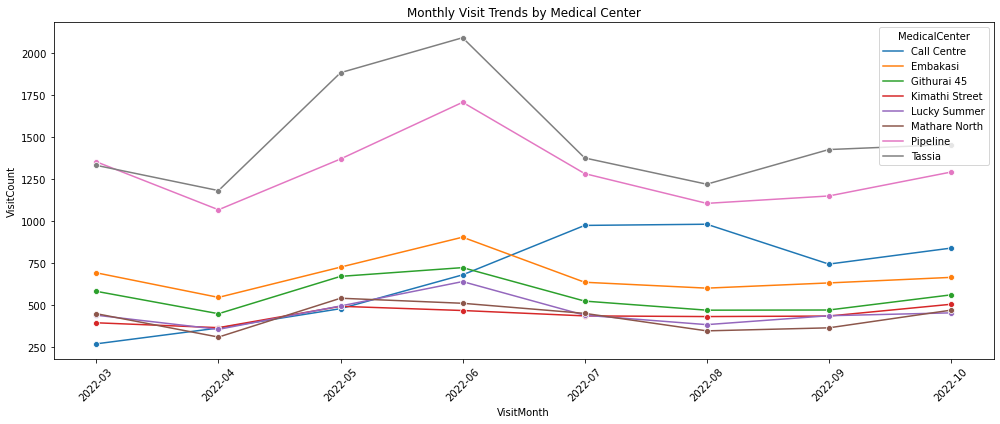

In [216]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_trend, x='VisitMonth', y='VisitCount', hue='MedicalCenter', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Visit Trends by Medical Center')
plt.tight_layout()
plt.show()

- Tassia and Pipeline consistently attract the highest number of visits.
- Peaks in their lines suggest periods of high demand—likely influenced by seasonal illnesses, campaigns, or location-based factors.
- Call Centre (Telemedicine) shows a steady increase in visits, indicating a growing preference or access to remote consultations.
- Embakasi, Kimathi Street, and Lucky Summer maintain moderate and stable visit volumes.
- Mathare North and Githurai 45 have the lowest number of visits, and may need intervention to improve outreach or service accessibility.
- There are visible visit peaks mid-year, followed by dips—suggesting possible seasonal patterns.

### Compare Average Visits per Month per Medical Center

In [217]:
# Ensure date column is in datetime format
merged_df['VisitDateTime'] = pd.to_datetime(merged_df['VisitDateTime'])

# Extract Year-Month
merged_df['YearMonth'] = merged_df['VisitDateTime'].dt.to_period('M')

# Group by MedicalCenter and YearMonth
monthly_visits = merged_df.groupby(['MedicalCenter', 'YearMonth']).size().reset_index(name='VisitCount')

# Calculate average monthly visits per center
avg_visits = monthly_visits.groupby('MedicalCenter')['VisitCount'].mean().sort_values(ascending=False).reset_index()
avg_visits.columns = ['MedicalCenter', 'AverageMonthlyVisits']

# Display the result
avg_visits

,MedicalCenter,AverageMonthlyVisits
0,Tassia,1495.750
1,Pipeline,1291.125
2,Embakasi,676.250
3,Call Centre,667.375
4,Githurai 45,557.375
5,Lucky Summer,456.750
6,Kimathi Street,442.250
7,Mathare North,431.500


### Get Top Diagnoses
Top 10 Most Diagnoses

In [218]:
# Count frequency of each diagnosis
diagnosis_counts = merged_df['Diagnosis'].value_counts().dropna().head(10)
print(diagnosis_counts)

Not Diagnosed                          26028
acute nasopharyngitis                   4441
tonsillitis, acute bacterial            2864
acute gastritis                         1951
review                                  1568
acute rhinitis                          1345
acute bronchitis                        1192
family planning                         1189
pneumonia                               1061
gastroenteritis with no dehydration      891
Name: Diagnosis, dtype: int64


### Visualize Top Diagnoses

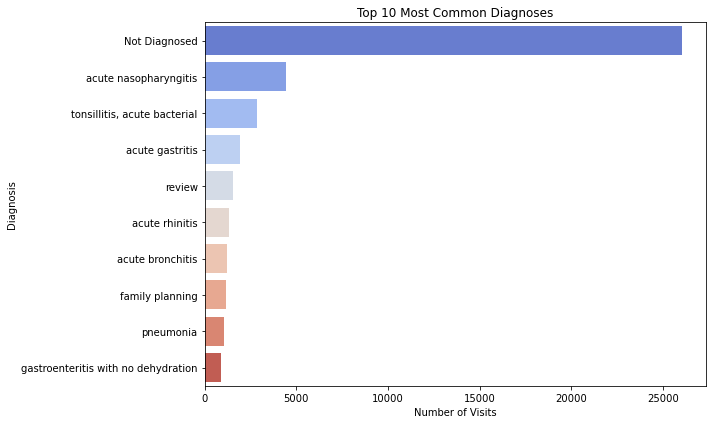

In [219]:
plt.figure(figsize=(10, 6))
sns.barplot(x=diagnosis_counts.values, y=diagnosis_counts.index, palette='coolwarm')
plt.title('Top 10 Most Common Diagnoses')
plt.xlabel('Number of Visits')
plt.ylabel('Diagnosis')
plt.tight_layout()
plt.show()

### Most Common Diagnoses by Medical Center
Which centers treat certain illnesses more often

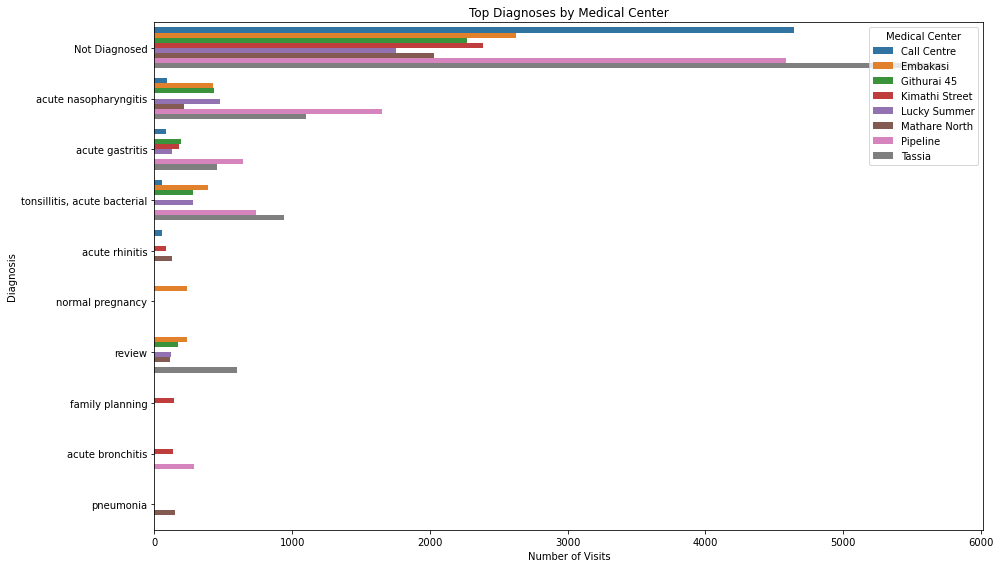

In [220]:
# Group and count diagnoses per medical center
diag_by_center = (
    merged_df.groupby(['MedicalCenter', 'Diagnosis'])
    .size()
    .reset_index(name='VisitCount')
    .sort_values(['MedicalCenter', 'VisitCount'], ascending=[True, False])
)

# Get top 5 diagnoses per medical center
top_diag_by_center = diag_by_center.groupby('MedicalCenter').head(5)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=top_diag_by_center, x='VisitCount', y='Diagnosis', hue='MedicalCenter')
plt.title('Top Diagnoses by Medical Center')
plt.xlabel('Number of Visits')
plt.ylabel('Diagnosis')
plt.legend(title='Medical Center')
plt.tight_layout()
plt.show()

### Diagnoses with Highest Average Payment
Which health conditions bring in the highest revenue.

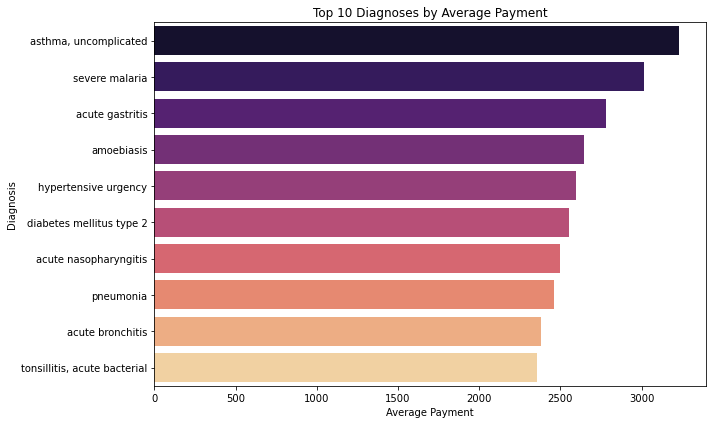

In [221]:
# Compute average amount per diagnosis
top_costly_diag = (
    merged_df.groupby('Diagnosis')['Amount']
    .mean()
    .sort_values(ascending=False)
    .dropna()
    .head(10)
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_costly_diag.values, y=top_costly_diag.index, palette='magma')
plt.title('Top 10 Diagnoses by Average Payment')
plt.xlabel('Average Payment')
plt.ylabel('Diagnosis')
plt.tight_layout()
plt.show()

### Common Diagnoses by Visit Category (In-person vs Telemedicine)
What diagnoses are handled via telemedicine vs in-person.

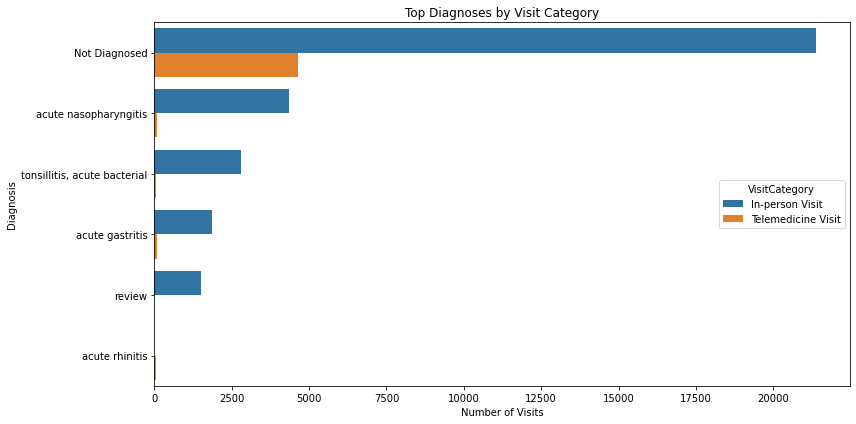

In [222]:
# Group and count by VisitCategory and Diagnosis
diag_by_category = (
    merged_df.groupby(['VisitCategory', 'Diagnosis'])
    .size()
    .reset_index(name='Count')
    .sort_values(['VisitCategory', 'Count'], ascending=[True, False])
)

# Take top 5 for each category
top_diag_by_category = diag_by_category.groupby('VisitCategory').head(5)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_diag_by_category, x='Count', y='Diagnosis', hue='VisitCategory')
plt.title('Top Diagnoses by Visit Category')
plt.xlabel('Number of Visits')
plt.ylabel('Diagnosis')
plt.tight_layout()
plt.show()

### Payment Amount Distribution
Are most payments clustered at low amounts, or do we have high-value outliers?

In [223]:
merged_df.columns

Index(['VisitCode', 'PatientCode', 'VisitDateTime', 'MedicalCenter',
       'VisitCategory', 'Payor', 'NPS Score', 'Amount', 'Diagnosis',
       'VisitDate', 'VisitMonth', 'YearMonth'],
      dtype='object')

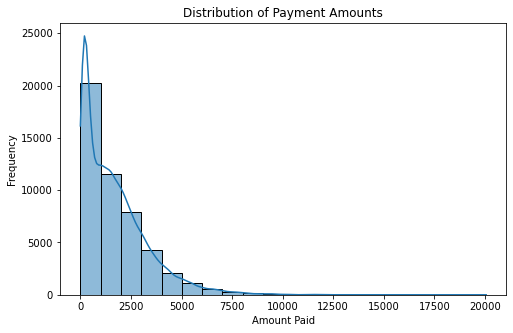

In [224]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['Amount'], bins=20, kde=True)
plt.title("Distribution of Payment Amounts")
plt.xlabel("Amount Paid")
plt.ylabel("Frequency")
plt.show()

### Most Common Visit Categories
Which visit types are the most frequent?

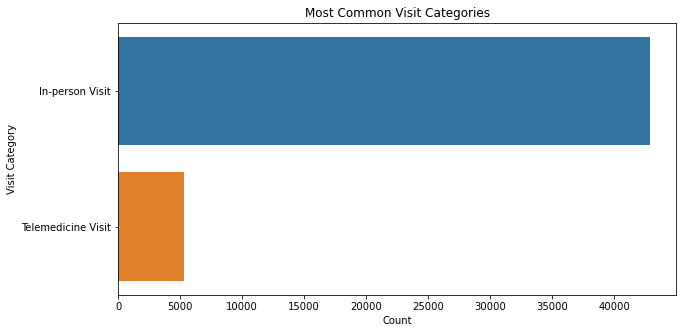

In [225]:
plt.figure(figsize=(10, 5))
sns.countplot(y=merged_df['VisitCategory'], order=merged_df['VisitCategory'].value_counts().index)
plt.title("Most Common Visit Categories")
plt.xlabel("Count")
plt.ylabel("Visit Category")
plt.show()

### Payment Amount by Visit Category
Do certain visit types lead to higher payments?
Are insurance-covered telemedicine visits more expensive than cash-paid ones?
Do cash patients pay more on average for in-person visits?
Are there large outliers in either group that might need audit?

In [226]:
payment_by_category = merged_df.groupby('VisitCategory')['Amount'].agg(['count', 'sum', 'mean', 'median']).reset_index()
print(payment_by_category)

        VisitCategory  count       sum         mean  median
0     In-person Visit  42829  80496354  1879.482453  1520.0
1  Telemedicine Visit   5318   2097111   394.342046   195.0


##### Visualize the Average Payment by Visit Category

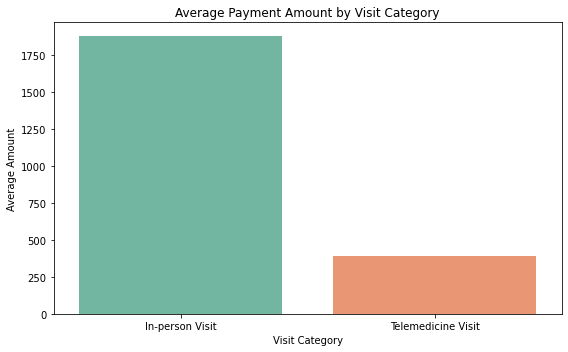

In [227]:
plt.figure(figsize=(8, 5))
sns.barplot(data=payment_by_category, x='VisitCategory', y='mean', palette='Set2')
plt.title("Average Payment Amount by Visit Category")
plt.ylabel("Average Amount")
plt.xlabel("Visit Category")
plt.tight_layout()
plt.show()

#### Group by Visit Category and Payor, Aggregate Amounts

In [228]:
# Grouping and aggregating payment statistics
payment_by_category_payor = (
    merged_df.groupby(['VisitCategory', 'Payor'])['Amount']
    .agg(['count', 'sum', 'mean', 'median'])
    .reset_index()
)

payment_by_category_payor

,VisitCategory,Payor,count,sum,mean,median
0,In-person Visit,Cash,29401,37345833,1270.223224,1040.0
1,In-person Visit,Insurance Company A,2403,6205535,2582.411569,2456.0
2,In-person Visit,Insurance Company B,11025,36944986,3351.019138,3117.0
3,Telemedicine Visit,Cash,5256,1986514,377.951674,195.0
4,Telemedicine Visit,Insurance Company A,2,600,300.000000,300.0
5,Telemedicine Visit,Insurance Company B,60,109997,1833.283333,1807.5


##### Visualize: Average Payment by Visit Category & Payor

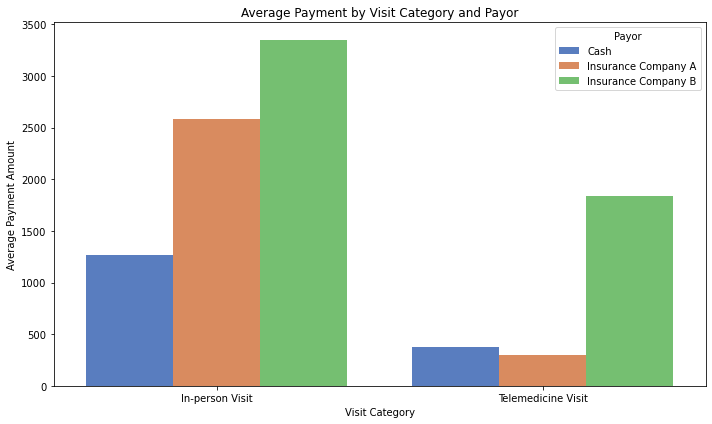

In [229]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=payment_by_category_payor,
    x='VisitCategory',
    y='mean',
    hue='Payor',
    palette='muted'
)
plt.title('Average Payment by Visit Category and Payor')
plt.xlabel('Visit Category')
plt.ylabel('Average Payment Amount')
plt.legend(title='Payor')
plt.tight_layout()
plt.show()

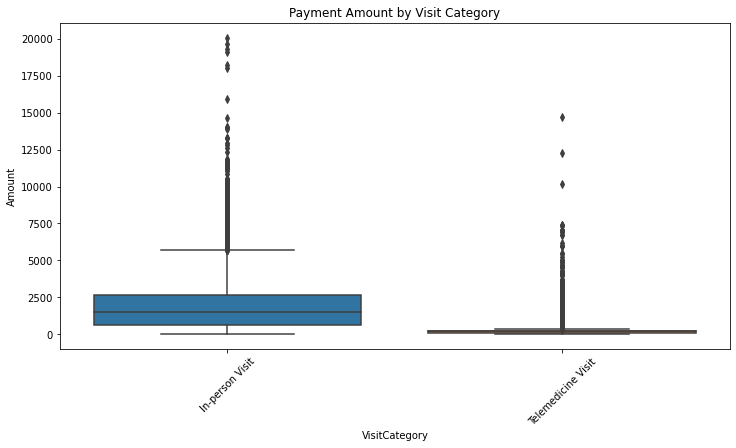

In [230]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='VisitCategory', y='Amount', data=merged_df)
plt.xticks(rotation=45)
plt.title('Payment Amount by Visit Category')
plt.show()

- Are insurance-covered telemedicine visits more expensive than cash-paid ones?
- Do cash patients pay more on average for in-person visits?
- Are there large outliers in either group that might need audit?

### Payment Trends by Medical Center

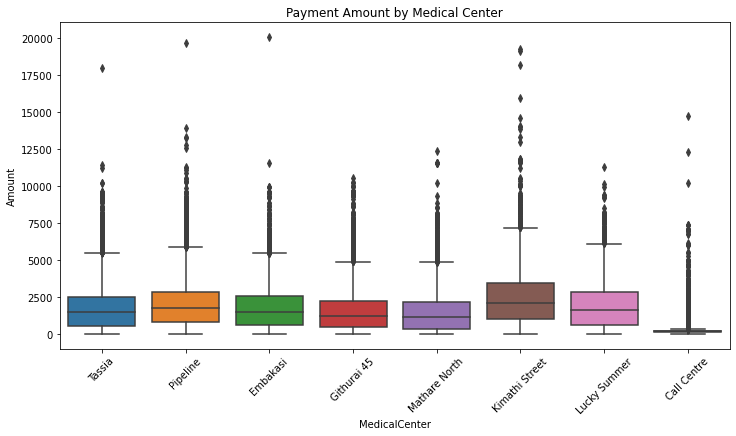

In [231]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='MedicalCenter', y='Amount', data=merged_df)
plt.xticks(rotation=45)
plt.title('Payment Amount by Medical Center')
plt.show()

### Diagnoses Trends
What are the most frequent diagnoses?

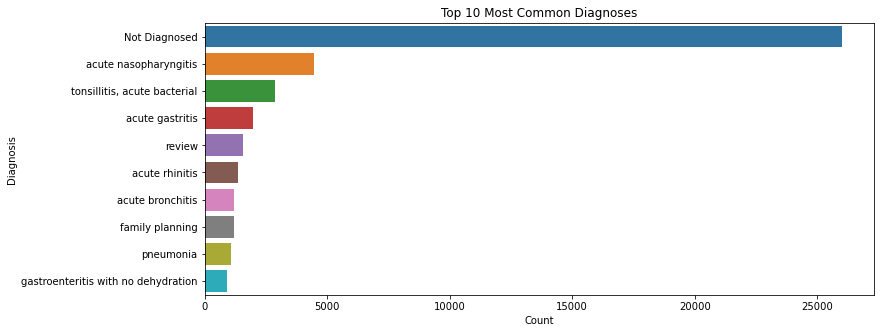

In [232]:
plt.figure(figsize=(12, 5))
sns.countplot(y='Diagnosis', data=merged_df, order=merged_df['Diagnosis'].value_counts().index[:10])
plt.title("Top 10 Most Common Diagnoses")
plt.xlabel("Count")
plt.ylabel("Diagnosis")
plt.show()

### Amount Collected by medical center

In [233]:
# Group by MedicalCenter and sum the AmountPaid
total_amount_per_center = merged_df.groupby('MedicalCenter')['Amount'].sum().reset_index()

# Sort by total amount in descending order
total_amount_per_center = total_amount_per_center.sort_values(by='Amount', ascending=False)

# Display the result
total_amount_per_center

,MedicalCenter,Amount
7,Tassia,21218222
6,Pipeline,21166353
1,Embakasi,9638916
3,Kimathi Street,8820619
4,Lucky Summer,7204814
2,Githurai 45,7147590
5,Mathare North,5298965
0,Call Centre,2097986


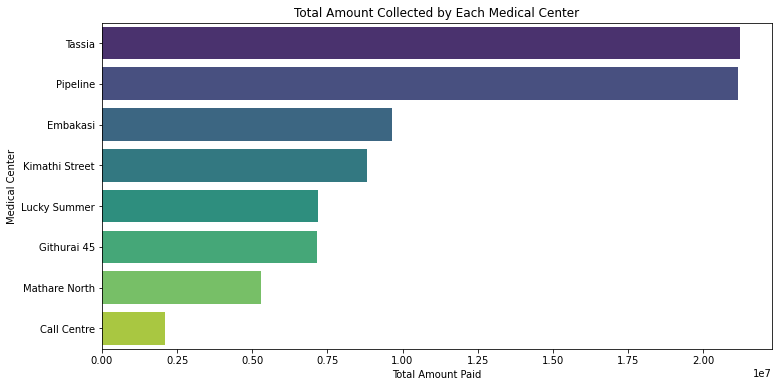

In [234]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='MedicalCenter', data=total_amount_per_center, palette="viridis")
plt.title("Total Amount Collected by Each Medical Center")
plt.xlabel("Total Amount Paid")
plt.ylabel("Medical Center")
plt.show()

- Tassia and Pipeline Dominate Revenue
- Each generated over 21 million KSh, significantly more than the rest.
- Likely due to higher patient volumes or higher billing per visit.
- Call Centre (Telemedicine) Generates the Least.This is expected—telemedicine services often have lower charges and may not include procedures or lab tests.

## . Patient Satisfaction

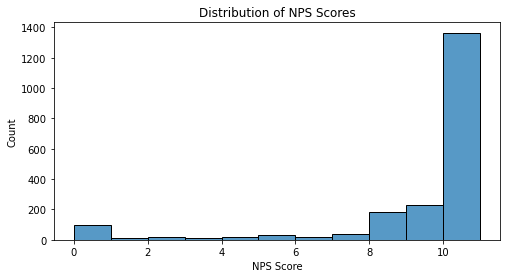

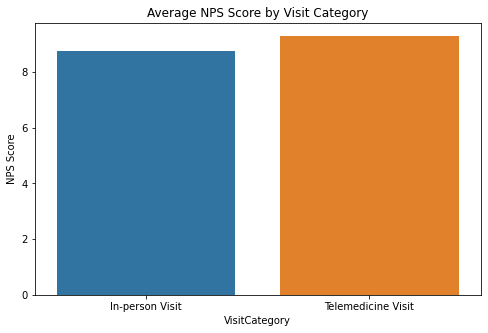

In [237]:
plt.figure(figsize=(8,4))
sns.histplot(merged_df['NPS Score'].dropna(), bins=11)
plt.title('Distribution of NPS Scores')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=merged_df.groupby('VisitCategory')['NPS Score'].mean().reset_index(), x='VisitCategory', y='NPS Score')
plt.title('Average NPS Score by Visit Category')
plt.show()

## 6.Conclusions
Visit Patterns
- In-person visits significantly outnumber telemedicine visits, but both are growing over time
- Tassia and Pipeline medical centers have the highest number of visits.
- Mathare North and Githurai 45 have the lowest average visits and may benefit from targeted interventions.
- Visit trends appear to peak mid-year across most centers, indicating seasonal healthcare needs.
- Telemedicine (Call Centre) shows upward growth — a key trend to capitalize on.

Diagnosis Trends
- A small number of diagnoses (e.g acute nasopharyngitis,tonsollitis and acute gastritis) dominate the majority of visits.
- These diagnoses also show seasonal trends, suggesting outbreaks or periodic health challenges.

Payment Insights
- Insurance-paid visits tend to have slightly higher average amounts especially for in person visits.
- There are notable outliers in payment amounts, which may represent specialized or emergency services.

Missing Data
- A significant number of telemedicine visits are missing diagnosis data, particularly in certain centers.
- This may indicate inconsistent documentation practices or technical limitations.

## 7.Recommendations

1. **Optimize High-Traffic Centers**
   - Add staff or expand hours at Tassia and Pipeline to manage demand during peak months.

2. **Strengthen Low-Performing Centers**
   - Explore causes of low traffic at Mathare North and Githurai 45 (e.g., awareness, location access, services offered).

3. **Leverage Telemedicine Growth**
   - Invest in virtual consultation infrastructure and outreach to grow Call Centre services.

4. **Use Seasonal Peaks Strategically**
   - Plan marketing, inventory, and staffing for mid-year peaks.

5. **Continue Monitoring Trends**
   - Maintain dashboards for monthly visits, revenue, and patient satisfaction per center.
   - Promote telemedicine for treatable diagnoses with high patient satisfaction.
   
- Address diagnosis recording gaps to improve data quality and clinical decision-making
- Given the high volume of in-person visits, evaluate whether some high-traffic centers (Tassia and Pipeline) need:
More staff
Extended hours
Dedicated telemedicine support
- Flag diagnosis as a required field before completing a visit record in the system 